# This notebook will be mainly used for Capstone project 
# PREDICTING THE HEART FAILURE

In [119]:
import pandas as pd

In [120]:
import numpy as np

In [121]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [122]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import warnings
from glob import glob
from IPython.display import display, Image
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import seaborn as sns

random_seed = 297

In [123]:
%matplotlib inline
warnings.filterwarnings("ignore")

In [124]:
import os

In [125]:
# The code was removed by Watson Studio for sharing.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [126]:
clean_data = df_data_1.astype({'anaemia': 'bool', 'diabetes': 'bool', 'high_blood_pressure':'bool', 'smoking':'bool','sex':'bool', 'DEATH_EVENT':'bool'})
clean_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,False,582,False,20,True,265000.00,1.9,130,True,False,4,True
1,55.0,False,7861,False,38,False,263358.03,1.1,136,True,False,6,True
2,65.0,False,146,False,20,False,162000.00,1.3,129,True,True,7,True
3,50.0,True,111,False,20,False,210000.00,1.9,137,True,False,7,True
4,65.0,True,160,True,20,False,327000.00,2.7,116,False,False,8,True


In [127]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null bool
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null bool
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null bool
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null bool
smoking                     299 non-null bool
time                        299 non-null int64
DEATH_EVENT                 299 non-null bool
dtypes: bool(6), float64(3), int64(4)
memory usage: 18.2 KB


In [128]:
df_data_1.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

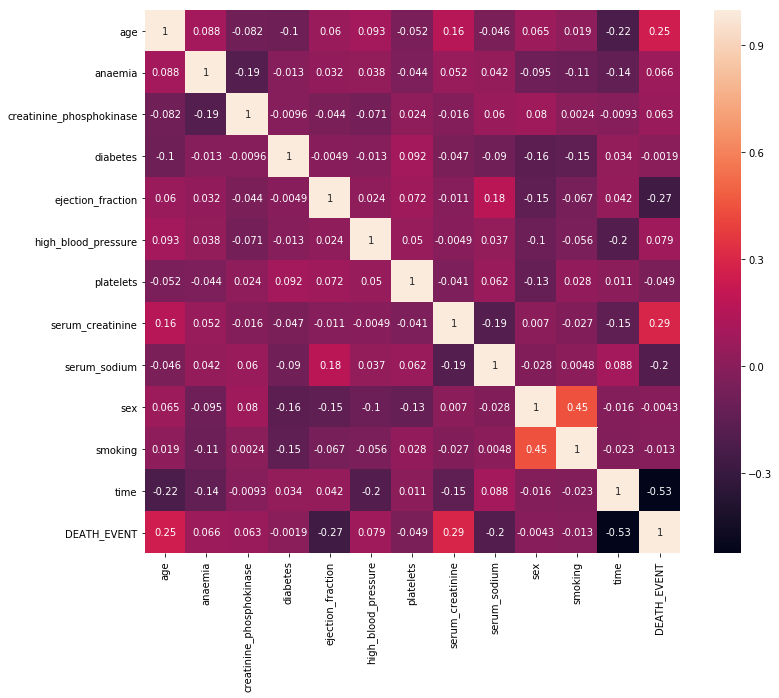

In [129]:
#Correlation between Features
plt.figure(figsize=(12,10))
sns.heatmap(df_data_1.corr(),annot=True)

In [130]:
df_data_1['DEATH_EVENT'].describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

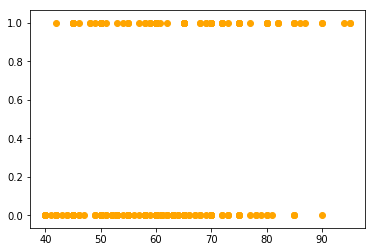

In [131]:
plt.scatter(x=df_data_1['age'],y=df_data_1['DEATH_EVENT'],color='orange')
#plt.figsize(10,10)

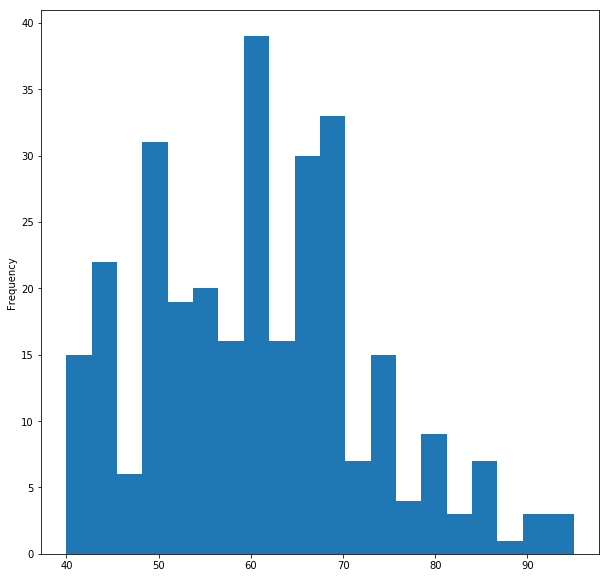

In [132]:
df_data_1['age'].plot(kind='hist', bins=20,figsize=(10,10))

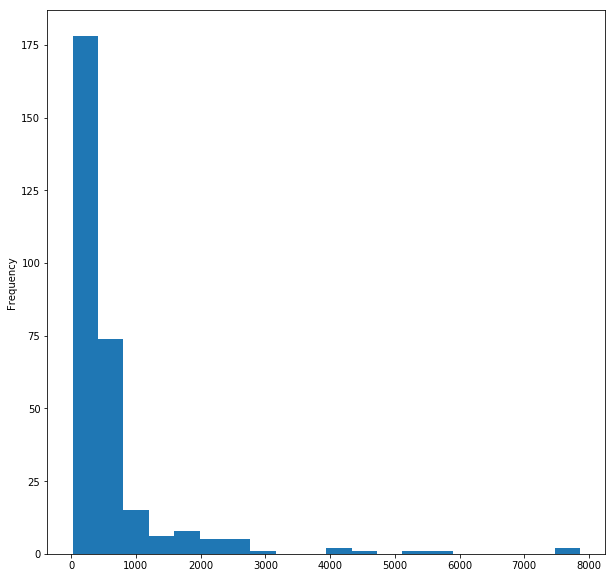

In [133]:
df_data_1['creatinine_phosphokinase'].plot(kind='hist', bins=20,figsize=(10,10))

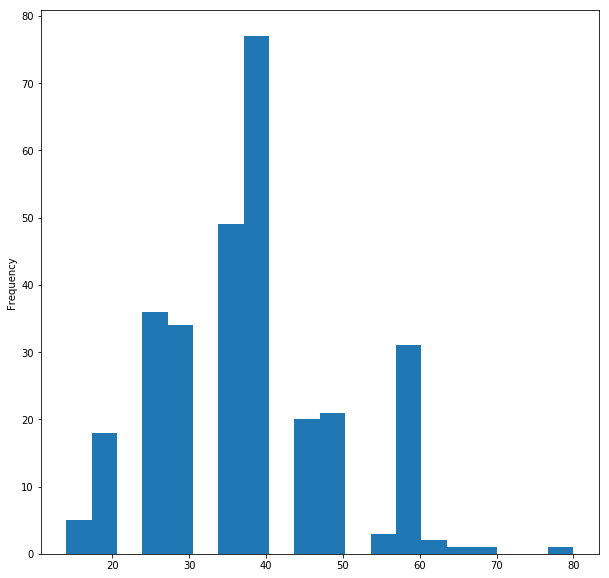

In [134]:
df_data_1['ejection_fraction'].plot(kind='hist', bins=20,figsize=(10,10))

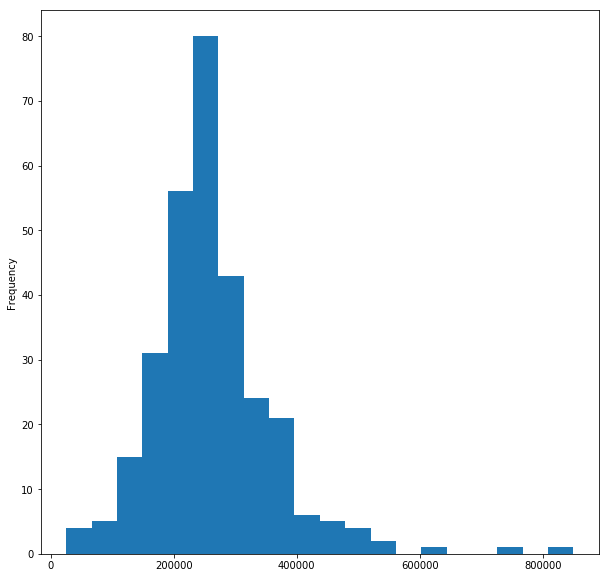

In [135]:
df_data_1['platelets'].plot(kind='hist', bins=20,figsize=(10,10))

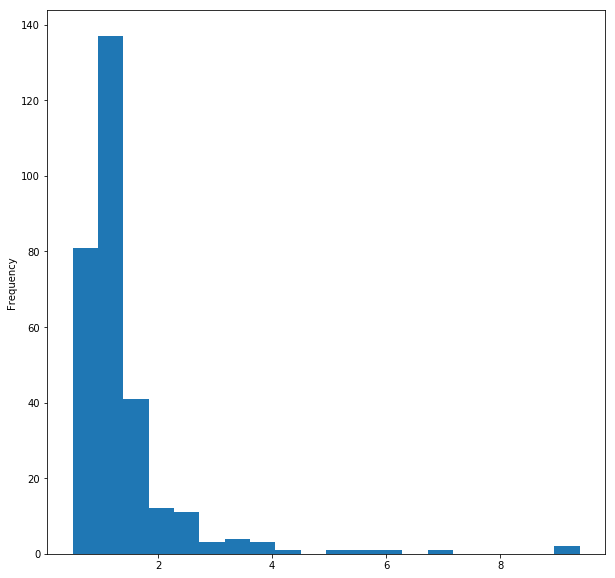

In [136]:
df_data_1['serum_creatinine'].plot(kind='hist', bins=20,figsize=(10,10))

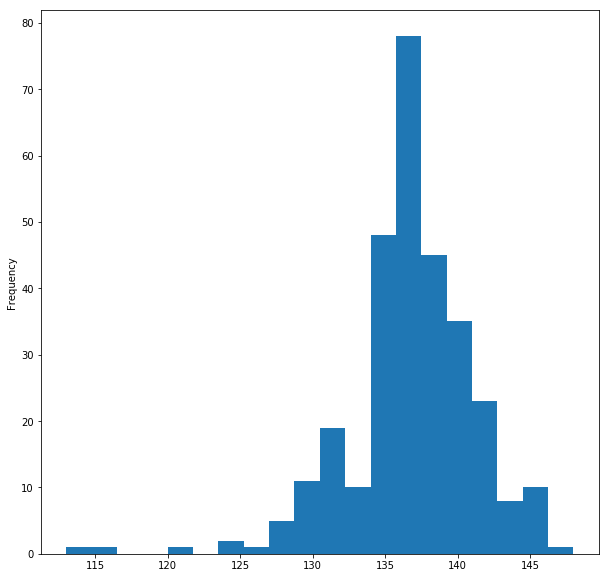

In [137]:
df_data_1['serum_sodium'].plot(kind='hist', bins=20,figsize=(10,10))

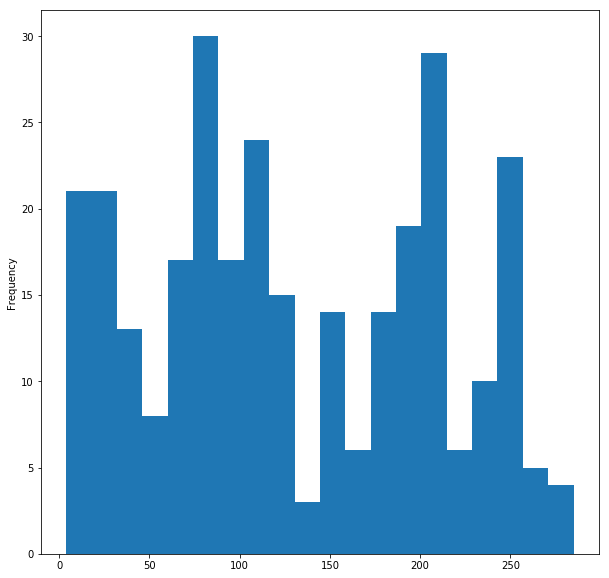

In [138]:
df_data_1['time'].plot(kind='hist', bins=20,figsize=(10,10))

In [139]:
deaths=df_data_1[df_data_1['DEATH_EVENT']==True]
deaths.shape

(96, 13)

In [140]:
deaths.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0
mean,65.215281,0.479167,670.197917,0.416667,33.468750,0.40625,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417,1.0
std,13.214556,0.502188,1316.580640,0.495595,12.525303,0.49371,98525.682856,1.468562,5.001579,0.480771,0.465946,62.378281,0.0
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.00000,47000.000000,0.600000,116.000000,0.000000,0.000000,4.000000,1.0
25%,55.000000,0.000000,128.750000,0.000000,25.000000,0.00000,197500.000000,1.075000,133.000000,0.000000,0.000000,25.500000,1.0
50%,65.000000,0.000000,259.000000,0.000000,30.000000,0.00000,258500.000000,1.300000,135.500000,1.000000,0.000000,44.500000,1.0
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.00000,311000.000000,1.900000,138.250000,1.000000,1.000000,102.250000,1.0
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.00000,621000.000000,9.400000,146.000000,1.000000,1.000000,241.000000,1.0


In [141]:
# Number of deaths due to anaemia/diabetes/high_blood_pressure

In [189]:
a=deaths['anaemia'].sum()
b=deaths['diabetes'].sum()
c=deaths['high_blood_pressure'].sum()
d=deaths['sex'].sum()
e=deaths['smoking'].sum()

to_print="Anaemic: {}, had diabetes: {}, had high blood pressure:{}, Is male:{}, smoking:{}".format(a,b,c,d,e)
print(to_print)

Anaemic: 46, had diabetes: 40, had high blood pressure:39, Is male:62, smoking:30


In [143]:
#How many people who died had all three

In [191]:
a1=np.logical_and(deaths['anaemia']==True,deaths['diabetes']==True)
b1=np.logical_and(deaths['anaemia']==True,deaths['high_blood_pressure']==True)
c1=np.logical_and(deaths['diabetes']==True,deaths['high_blood_pressure']==True)
d1=np.logical_and(deaths['sex']==True,deaths['high_blood_pressure']==True)
e1=np.logical_and(deaths['diabetes']==True,deaths['sex']==True)
f1=np.logical_and(deaths['anaemia']==True,deaths['sex']==True)
g1=np.logical_and(deaths['anaemia']==True,deaths['smoking']==True)
h1=np.logical_and(deaths['smoking']==True,deaths['sex']==True)
i1=np.logical_and(deaths['smoking']==True,deaths['high_blood_pressure']==True)
j1=np.logical_and(deaths['diabetes']==True,deaths['smoking']==True)



deaths[np.logical_and(a1,deaths['high_blood_pressure']==True)]['age'].count()

6

In [145]:
#How many people who died of anaemia and diabetes only

In [146]:
deaths[(a1)]['age'].count()

18

In [147]:
#How many people who died of anaemia and high_blood_pressure only

In [148]:
deaths[(b1)]['age'].count()

19

In [149]:
#How many people who died of diabetes and high_blood_pressure only

In [150]:
deaths[(c1)]['age'].count()

17

In [151]:
#How many people who died of high_blood_pressure and were male

In [152]:
deaths[(d1)]['age'].count()

22

In [153]:
#How many people who died of diabetes and were male

In [154]:
deaths[(e1)]['age'].count()

20

In [155]:
#How many people who died of anaemia and were male

In [156]:
deaths[(f1)]['age'].count()

26

In [196]:
#How many died of smoking with anaemia

In [192]:
deaths[(g1)]['age'].count()

12

In [197]:
#How many male died of smoking

In [193]:
deaths[(h1)]['age'].count()

27

In [198]:
#How many died of smoking and high blood pressure

In [194]:
deaths[(i1)]['age'].count()

14

In [200]:
#How many died of smoking and diabetes

In [195]:
deaths[(j1)]['age'].count()

12

In [199]:
#Total deaths

In [157]:
deaths['age'].count()

96

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X=df_data_1.iloc[:,:-1]
Y=df_data_1['DEATH_EVENT']

In [160]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (209, 12) (209,)
Test set: (90, 12) (90,)


In [161]:
from sklearn import preprocessing as sk_preprocessing
scaler = sk_preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [163]:
yhat = LR.predict(X_test)

In [164]:
yhat_prob = LR.predict_proba(X_test)

In [165]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [166]:
print('Classification f1-score', f1_score(y_test, yhat))
print('Classification precision', precision_score(y_test, yhat))
print('Classification recall', recall_score(y_test, yhat))

Classification f1-score 0.0
Classification precision 0.0
Classification recall 0.0


In [167]:
#'age' has been removed from the feature list
X1=np.asarray(df_data_1[['anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']])

Y1=np.asarray(df_data_1[['DEATH_EVENT']])

In [168]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, Y1, test_size=0.3, random_state=4)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (209, 11) (209, 1)
Test set: (90, 11) (90, 1)


In [169]:
LR1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train1,y_train1)
LR1

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [170]:
yhat1 = LR1.predict(X_test1)
yhat1

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0])

In [171]:
yhat_prob1 = LR1.predict_proba(X_test1)

In [172]:
print('Classification f1-score', f1_score(y_test1, yhat1))
print('Classification precision', precision_score(y_test1, yhat1))
print('Classification recall', recall_score(y_test1, yhat1))

Classification f1-score 0.76
Classification precision 0.7307692307692307
Classification recall 0.7916666666666666


In [173]:
X2=np.asarray(df_data_1[['anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'smoking','sex','age']])

Y2=np.asarray(df_data_1[['DEATH_EVENT']])

In [174]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X2, Y2, test_size=0.3, random_state=4)
print ('Train set:', X_train2.shape,  y_train2.shape)
print ('Test set:', X_test2.shape,  y_test2.shape)

Train set: (209, 11) (209, 1)
Test set: (90, 11) (90, 1)


In [175]:
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train2,y_train2)
LR2

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [176]:
yhat2 = LR2.predict(X_test2)
yhat2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0])

In [177]:
yhat_prob2 = LR2.predict_proba(X_test2)

In [178]:
print('Classification f1-score', f1_score(y_test2, yhat2))
print('Classification precision', precision_score(y_test2, yhat2))
print('Classification recall', recall_score(y_test2, yhat2))

Classification f1-score 0.4
Classification precision 0.6363636363636364
Classification recall 0.2916666666666667


In [179]:
import xgboost

# Specify Model
df_data_1_XGBmodel = xgboost.XGBClassifier(random_state=random_seed)
# Fit Model
df_data_1_XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=297, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

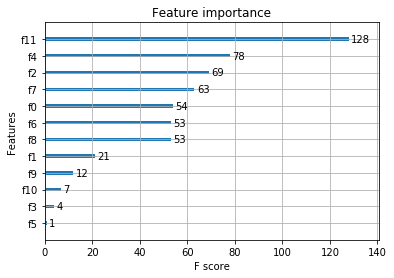

In [180]:
xgboost.plot_importance(df_data_1_XGBmodel)
# f0 ----- age
# f1 ----- anaemia
# f2 ----- creatinine_phosphokinase
# f3 ----- diabetes
# f4 ----- ejection_fraction
# f5 ----- high_blood_pressure
# f6 ----- platelets
# f7 ----- serum_creatinine
# f8 ----- serum_sodium
# f9 ----- sex
# f10 ---- smoking
# f11 ---- time

In [181]:
#'age' has been removed from the feature list
X1=np.asarray(df_data_1[['time', 'age']])

Y1=np.asarray(df_data_1[['DEATH_EVENT']])

X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, Y1, test_size=0.3, random_state=4)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

LR1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train1,y_train1)
LR1

yhat1 = LR1.predict(X_test1)
yhat1

yhat_prob1 = LR1.predict_proba(X_test1)

print('Classification f1-score', f1_score(y_test1, yhat1))
print('Classification precision', precision_score(y_test1, yhat1))
print('Classification recall', recall_score(y_test1, yhat1))

Train set: (209, 2) (209, 1)
Test set: (90, 2) (90, 1)
Classification f1-score 0.7083333333333334
Classification precision 0.7083333333333334
Classification recall 0.7083333333333334


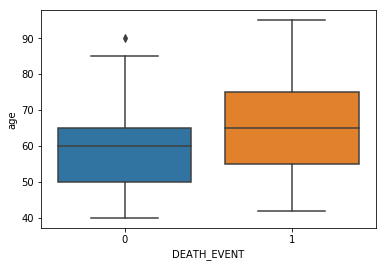

In [182]:
 sns.boxplot(x="DEATH_EVENT", y="age", data=df_data_1)

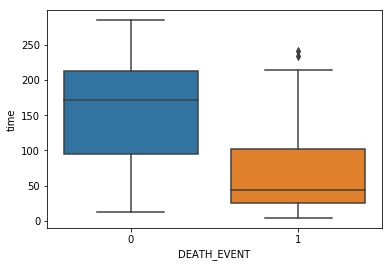

In [183]:
 sns.boxplot(x="DEATH_EVENT", y="time", data=df_data_1)

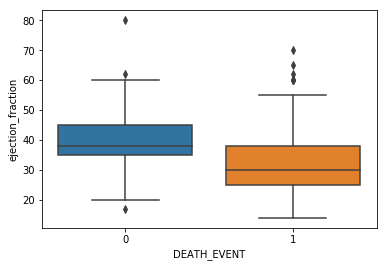

In [184]:
 sns.boxplot(x="DEATH_EVENT", y="ejection_fraction", data=df_data_1)

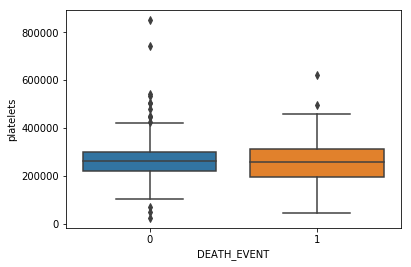

In [186]:
sns.boxplot(x="DEATH_EVENT", y="platelets", data=df_data_1)

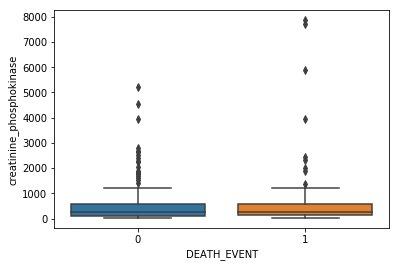

In [188]:
 sns.boxplot(x="DEATH_EVENT", y="creatinine_phosphokinase", data=df_data_1)

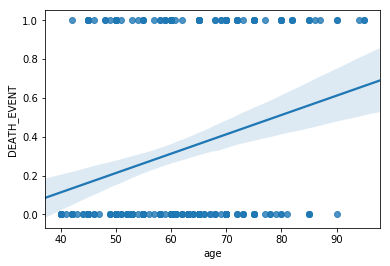

In [212]:
sns.regplot(x="age", y="DEATH_EVENT", data=df_data_1)